In [1]:
%matplotlib inline
import argparse
import models
import os
import time
import cv2
from keras import backend as K
import tensorflow as tf
from data_generator import *
from utils import prepare_repo
from label import labels
from matplotlib import pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
tf.keras.backend.clear_session()

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(sess)

In [4]:
net = 'ICNET'
width = 640
height = 320
num_classes = 20
weights_path = 'weights/weights_{}.h5'.format(net)

In [5]:
model = models.get_model(net, width, height, num_classes, weights_path)

ICNET


In [6]:
img = cv2.imread('test.jpg', 1)
img = cv2.resize(img, (width, height))
img = img.reshape(-1, *img.shape)

In [7]:
start_time = time.time()
pred = model.predict(img, batch_size=1)
duration = time.time() - start_time

print('Generated segmentations in %s seconds -- %s FPS' % (duration, 1.0/duration))

Generated segmentations in 0.9437873363494873 seconds -- 1.0595607309883388 FPS


In [8]:
pred_img = np.argmax(pred[0], axis=-1)
print(pred_img.shape)

unique, counts = np.unique(pred_img, return_counts=True)

print(unique, counts)

(80, 160)
[ 0  2  4  5  8  9 10 13 14 19] [3755 2860    2   13 1017    1 3450 1460  232   10]


In [9]:
col_img = np.zeros((*pred_img.shape, 3), dtype=np.uint8)

for label in labels:
    color = label.color
    trainId = label.trainId
    col_img[pred_img == trainId] = color    

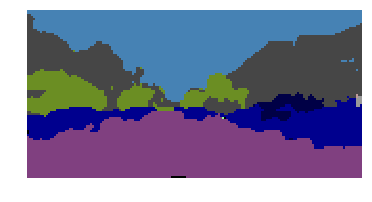

In [10]:
plt.imshow(col_img)
plt.axis('off')
plt.show()